## AIN 212 Elements of Data Science Course Project
## Nurşah Satılmış  2210765010
## Özge Bülbül      2220765008

## Data Collection



The dataset was supposed to consist of at least 3000 data points with 10 features at minimum. We picked the amazon food reviews dataset from kaggle. It contains the following columns: "Id",	"ProductId",	"UserId",	"ProfileName",	"HelpfulnessNumerator",	"HelpfulnessDenominator",	"Score",	"Time",	"Summary" and	"Text". We will be using the textual reviews while predicting the score values which are integers that range from 0 to 5.

In [1]:
# the necessary imports below
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
!pip install textblob
import textblob
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
!pip install category_encoders
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
import itertools
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zgebl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zgebl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zgebl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zgebl\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
You should consider upgrading via the 'C:\Users\zgebl\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\zgebl\AppData\Roaming\nltk_data...
[nltk_data]   Package

You should consider upgrading via the 'C:\Users\zgebl\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [62]:
data_url = "https://docs.google.com/spreadsheets/d/1bXCXHL8Uvi8PnSG6dPWIwR0oEoRxioIKxjRKJWzml34/edit?usp=sharing"

url = pd.read_csv("https://drive.google.com/uc?export=download&id=1bXCXHL8Uvi8PnSG6dPWIwR0oEoRxioIKxjRKJWzml34")
url.sample(3)
# Read the CSV file directly into a DataFrame
df = pd.read_csv(url, delimiter='\t', encoding='utf-8')
df.head()

HTTPError: HTTP Error 500: Internal Server Error

In [55]:
df= pd.read_csv('food_review.csv')
review = df.copy()

ParserError: Error tokenizing data. C error: Expected 10 fields in line 5, saw 751


In [51]:
review.head(5)

,"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style nonce=""HXrjSqCCQDKtcVt123bpdA"">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xGIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fChc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu7GxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fChc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfChc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>shortened_dataset.csv - Google Drive</title><meta property=""og:title"" content=""shortened_dataset.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/17bOPC2i4bsFXGw83MPKwZLq3z9A1mbO6/view?usp=drive_link&amp;usp=embed_facebook""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""><link rel=""stylesheet"" href=""https://fonts.googleapis.com/css?family=Google+Sans:300",400,500,"700"" nonce=""HXrjSqCCQDKtcVt123bpdA""><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.w_bltrYA4bk.L.W.O/am=AAM/d=0/rs=AO0039tF3FZSP7aIZoz-9pGjiprK4RWddQ"" nonce=""HXrjSqCCQDKtcVt123bpdA""><script nonce=""u3SNpMlWkMGYZjFfPKt7GQ"">_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_nf""","docs-crs:""docs_crs_nl""",docs-fe-re:2,docs-fl:1,docs-l1lc:2,"docs-l1lm:""MRN""",...,0.89,0.90,1.71,72175901,0].9,[[null.2,null.216,null.217,"https://www.gstatic.com/og/_/js/k=og.qtm.en_US.-lPVzGIwpas.es5.O/rt=j/m=qabr,q_dnp,qapid,q_dg/exm=qaaw,qadd,qaid,qein,qhaw,qhba,qhbr,qhch,qhga,qhid,qhin/d=1/ed=1/rs=AA2YrTslst2ELNICP_e2mX8nzvesTxCMmQ]]]]",};this.gbar_=this.gbar_||{};(function(_){var window=this;
0,try{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"_._F_toggles_initialize=function(a){(""undefine...",_._F_toggles_initialize)([]);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Copyright The Closure Library Authors.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPDX-License-Identifier: Apache-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing and Cleaning


In [4]:
review.drop("Id",axis = 1 , inplace= True)

The "Id" column is the identifier of rows (since we use a partial dataset of the original, it starts from 14).Thus it is dropped.

In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15075 entries, 0 to 15074
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProductId               15075 non-null  object
 1   UserId                  15075 non-null  object
 2   ProfileName             15070 non-null  object
 3   HelpfulnessNumerator    15075 non-null  int64 
 4   HelpfulnessDenominator  15075 non-null  int64 
 5   Score                   15075 non-null  int64 
 6   Time                    15075 non-null  int64 
 7   Summary                 15075 non-null  object
 8   Text                    15075 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


In [6]:
review.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,15075.000000,15075.000000,15075.000000,1.507500e+04
mean,1.234892,1.984345,4.410879,1.251395e+09
std,5.314828,6.221586,1.131321,4.892363e+07
min,0.000000,0.000000,1.000000,1.068077e+09
25%,0.000000,0.000000,4.000000,1.217678e+09
50%,0.000000,1.000000,5.000000,1.258157e+09
75%,1.000000,2.000000,5.000000,1.283299e+09
max,466.000000,488.000000,5.000000,1.351210e+09


In [7]:
review.isna().sum()

ProductId                 0
UserId                    0
ProfileName               5
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Above, it is shown that there are only 5 null values. Since we already have 15075 rows and the nulls cover only 0.03% of the dataset, we chose to drop them.

In [8]:
review.dropna(inplace=True)

In [9]:
review.isna().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
duplicated_rows= review[review.duplicated()]
duplicated_rows

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
670,B000YSS7EO,A20P8VC55KPPCT,FL Mom,0,0,5,1274486400,Love the Probiotics!,This is a great cereal and with added Probioti...
671,B000YSS7EO,A20P8VC55KPPCT,FL Mom,0,0,5,1274486400,Love the Probiotics!,This is a great cereal and with added Probioti...
4192,B000YSQ9GC,A20P8VC55KPPCT,FL Mom,0,0,5,1274486400,Love the Probiotics!,This is a great cereal and with added Probioti...
4193,B000YSQ9GC,A20P8VC55KPPCT,FL Mom,0,0,5,1274486400,Love the Probiotics!,This is a great cereal and with added Probioti...
4883,B001NXM3I0,A20P8VC55KPPCT,FL Mom,1,1,5,1274227200,Great snacks!,These Puffs are great and my son loves them. T...
6602,B001NXHY8Y,A20P8VC55KPPCT,FL Mom,1,1,5,1274227200,Great snacks!,These Puffs are great and my son loves them. T...
8285,B001NXM3GM,A20P8VC55KPPCT,FL Mom,1,1,5,1274227200,Great snacks!,These Puffs are great and my son loves them. T...
11948,B000YSTGGW,A20P8VC55KPPCT,FL Mom,0,0,5,1274486400,Love the Probiotics!,This is a great cereal and with added Probioti...
11949,B000YSTGGW,A20P8VC55KPPCT,FL Mom,0,0,5,1274486400,Love the Probiotics!,This is a great cereal and with added Probioti...


In [11]:
review.drop_duplicates(inplace = True)


Some duplicated rows detected here, they are dropped.

In [12]:
review['Helpfulness_Rate'] = review.apply(lambda row: row['HelpfulnessNumerator'] / row['HelpfulnessDenominator'] if row['HelpfulnessDenominator'] != 0 else 0, axis=1)
review.drop(['HelpfulnessNumerator', 'HelpfulnessDenominator'], axis=1,inplace = True)
review.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor! these came securely packed... the...,1.0
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,I love this candy. After weight watchers I ha...,0.0
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0.0
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",0.0
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,1.0


Above, we combined the helpfulness numerator and denominator columns and created a "helpfulness rate" feature.

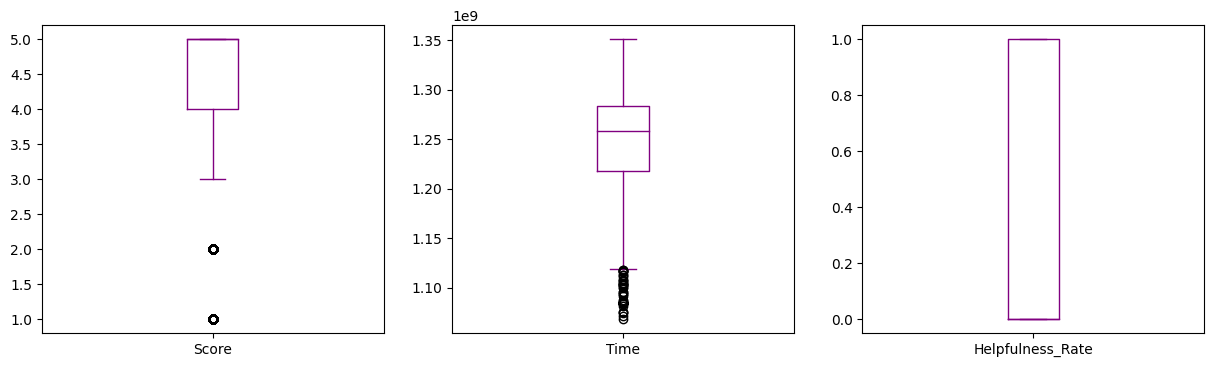

In [13]:
review.plot(kind="box",subplots=True,figsize=(15,4), color="purple")
plt.show()

We defined a function that takes a df and its numerical columns, removes each columns values which are outside the interquartile range bounds. Then returns this outlier removed df.

In [14]:
def outlier_remover(df, columns):
    outlier_removed_df = df.copy()

    for column in columns:
        data = outlier_removed_df[column]
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (data < lower_bound) | (data > upper_bound)
        outlier_removed_df.loc[outliers, column] = None

    return outlier_removed_df

In [15]:
numerical_columns = review.select_dtypes(include=np.number).columns
numerical_columns = numerical_columns.drop('Score') #Target variable
(outlier_remover(review, numerical_columns)).isna().sum()

ProductId            0
UserId               0
ProfileName          0
Score                0
Time                60
Summary              0
Text                 0
Helpfulness_Rate     0
dtype: int64

We checked for outliers, there are 60 in time column.It will be handled by mix-max scaler in data exploration parts.

In [16]:
review.Score.unique()

array([4, 5, 1, 2, 3], dtype=int64)

We checked the unique values of "Score". They are 1, 2, 3, 4 and 5.
 All scores are valid.

At this point, we handled missing values, checked for outliers and handled them. Now all values are valid.

In the code segment below, we visualized the frequencies of the numerical columns with the help of histograms.

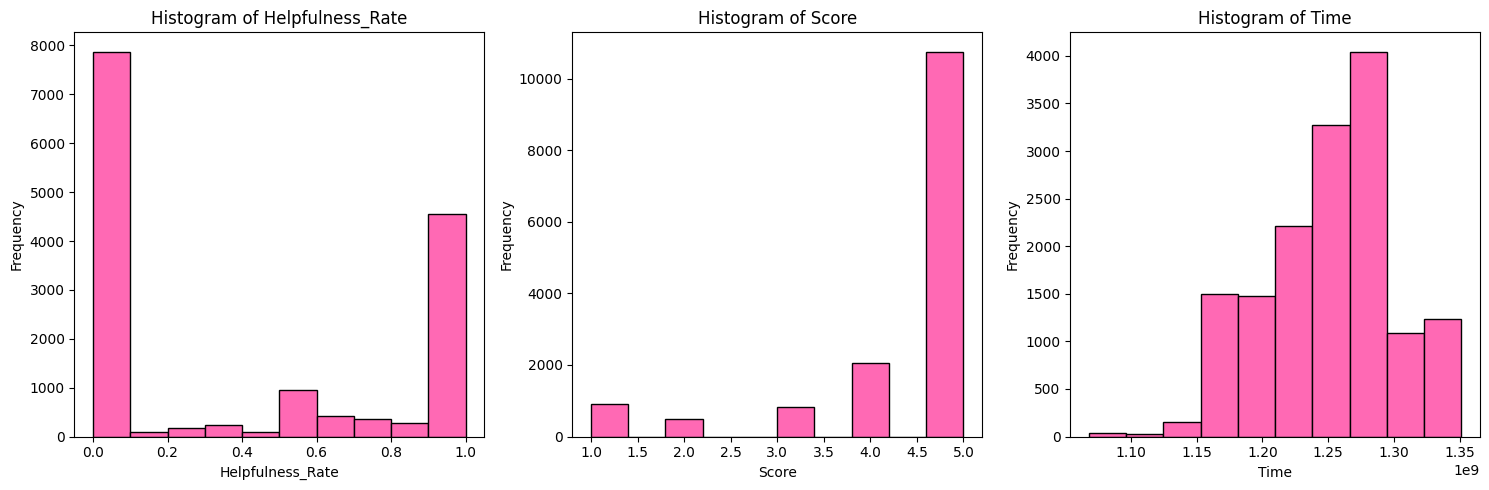

In [17]:
numerical_columns = ["Helpfulness_Rate","Score", "Time"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for j in range(3):  # Loop through columns
    column = numerical_columns[j]
    if column == "Helpfulness_Rate":
        review["Helpfulness_Rate"].plot(kind="hist", bins=10, color="hotpink", range=(0, 1), edgecolor="black", ax=axes[j])
    else:
        review[column].plot(kind="hist", bins=10, color="hotpink", edgecolor="black", ax=axes[j])
    axes[j].set_title(f"Histogram of {column}")
    axes[j].set_xlabel(column)
    axes[j].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

We lowered the letters and then removed punctutation marks using our remove_punctuation_with_regex function. Then we removed numbers using our remove_numbers function. We used regex to do these steps.

In [18]:
review['Text'] = review['Text'].str.lower()
review.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor! these came securely packed... the...,1.0
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,i love this candy. after weight watchers i ha...,0.0
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,"the candy is just red , no flavor . just plan...",0.0
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,"this oatmeal is not good. its mushy, soft, i d...",0.0
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived in 6 days and were so stale i could no...,1.0


In [19]:
def remove_punctuation_with_regex(text):
    """Custom function to remove punctuation using regex."""
    return re.sub(r'[^\w\s]', '', text)
review['Text'] = review['Text'].apply(remove_punctuation_with_regex)

In [20]:
def remove_numbers(text):
    """Custom function to remove numbers."""
    return re.sub(r'\d', '', text)

# Applying the function to the 'Text' column in the 'review' DataFrame
review['Text'] = review['Text'].apply(remove_numbers)

review.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor these came securely packed they we...,1.0
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,i love this candy after weight watchers i had...,0.0
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,the candy is just red no flavor just plan a...,0.0
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,this oatmeal is not good its mushy soft i dont...,0.0
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived in days and were so stale i could not...,1.0


Here, we used nltk stopwords to remove the stopwords from our reviews. The words "with, from, to, and" can be given as stopword examples. We don't need these for our score prediction.

In [21]:
## Removal of Stopwords
STOPWORDS = set(stopwords.words('english'))
print("Stop words like ",  list(STOPWORDS)[1:10]," is removed" )
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

review['Text'] = review['Text'].apply(lambda text: remove_stopwords(text))
review.head()

Stop words like  ['or', 'until', 'under', 'this', 'be', 'why', 'ain', 'yours', 'doing']  is removed


,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,love candy weight watchers cut back still craving,0.0
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy,0.0
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived days stale could eat bags,1.0


We seperated reviews to another dataframe called "test_df" to make our following operations easier.

In [22]:
text_df = pd.DataFrame(review, columns = ['Text'])
text_df.head()

,Text
0,good flavor came securely packed fresh delicio...
1,love candy weight watchers cut back still craving
2,candy red flavor plan chewy would never buy
3,oatmeal good mushy soft dont like quaker oats ...
4,arrived days stale could eat bags


In [23]:
pd.Series(" ".join(text_df["Text"]).split()).value_counts()

great      3335
good       3155
love       2572
tea        1730
like       1704
           ... 
amy           1
brian         1
tasy          1
ick           1
kippers       1
Name: count, Length: 8217, dtype: int64

In the section below, we defined the get_sentiment_score function. This function takes our review texts as parameter and returns the sentiment score by using TextBlob. We applied this to processed texts and added these scores to our df.

In [24]:
review.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,love candy weight watchers cut back still craving,0.0
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy,0.0
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived days stale could eat bags,1.0


In [25]:
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
review['scores'] = text_df['Text'].apply(get_sentiment_score)

review.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate,scores
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0,0.58
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,love candy weight watchers cut back still craving,0.0,0.25
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy,0.0,0.00
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0,0.40
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived days stale could eat bags,1.0,-0.50


In the section below, we defined the get_sentiment_score_sentiment function. This function takes our review texts as parameter and returns the sentiment score by using "SentimentIntensityAnalyzer". We applied this to our processed texts and added these scores to our df.

In [26]:
sid = SentimentIntensityAnalyzer()
def get_sentiment_score_sentiment(text):
    scores = sid.polarity_scores(text)
    # You can choose to return the compound score for an overall sentiment score
    return scores['compound']

review['sentiment_score'] = text_df['Text'].apply(get_sentiment_score_sentiment)

In [27]:
def scale_scores(score):
  if pd.notna(score):
      normalized_score = (score+1) / (2)
      scaled_score = normalized_score * (4) + 1
      return int(round(scaled_score))
  else:
    return np.nan

In [28]:
review['scores'] = review['scores'].apply(scale_scores).astype('Int64')
review['sentiment_score'] = review['sentiment_score'].apply(scale_scores).astype('Int64')

Above, sentiment scores originally ranging from -1 to 1, are transformed to a new scale from 1 to 5 using our scale_scores function. Then these scores are updated into our df.

In [29]:
review.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate,scores,sentiment_score
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0,4,5
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,love candy weight watchers cut back still craving,0.0,4,4
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy,0.0,3,3
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0,4,3
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived days stale could eat bags,1.0,2,3


In [30]:
abs_error_scores = abs(review['Score'] - review['scores'])
abs_error_sentiment_score = abs(review['Score'] - review['sentiment_score'])

print("Absolute Error (Score - scores):")
print(abs_error_scores.sum()/len(review))
print("\nAbsolute Error (Score - sentiment_score):")
print(abs_error_sentiment_score.sum()/len(review))

Absolute Error (Score - scores):
1.0620144744704867

Absolute Error (Score - sentiment_score):
0.7657526060686541


As you can see, after calculating the mean score differences, the minimum error belongs to the dataframe sentiment analyzed with "SentimentIntensityAnalyzer". Because of this, we dropped the textblob analyzed, "scores" column.

In [31]:
columnsToDrop = ['scores']
df = review.drop(columnsToDrop, axis=1)
df.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate,sentiment_score
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0,5
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,love candy weight watchers cut back still craving,0.0,4
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy,0.0,3
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0,3
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived days stale could eat bags,1.0,3


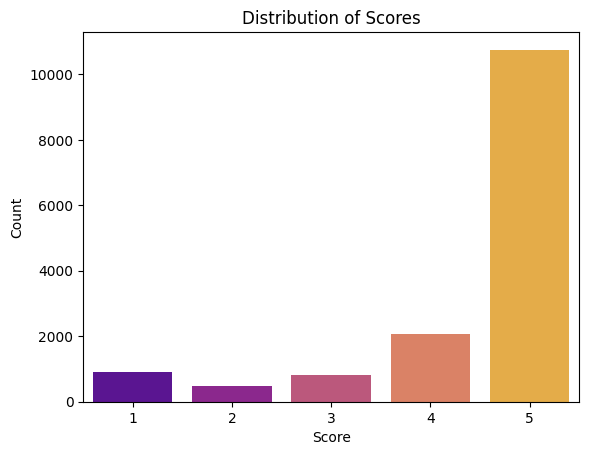

In [32]:
sns.countplot(data=review, x='Score', palette="plasma")
plt.title('Distribution of Scores')
plt.xlabel('Score') #target feature
plt.ylabel('Count')

fig = plt.gcf()
fig.savefig('count_plot.png')

plt.show()

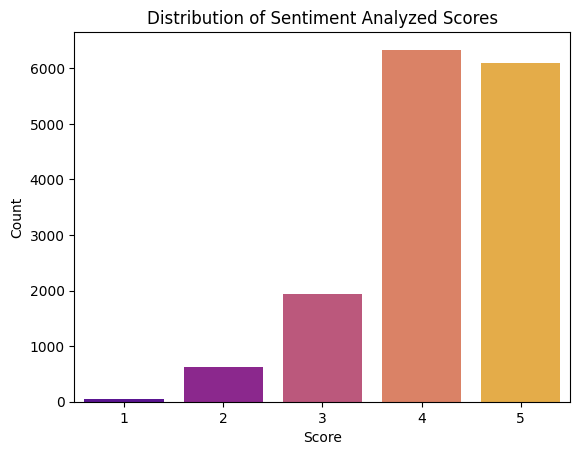

In [33]:
sns.countplot(data=review, x='sentiment_score', palette="plasma")
plt.title('Distribution of Sentiment Analyzed Scores')
plt.xlabel('Score')
plt.ylabel('Count')

plt.savefig('count_plot.png')

plt.show()

Above, we visualized frequency distributions of the original score and sentiment analyzed score features.

## Data Exploration and Analysis



In this section, we applied various visualization techniques to view possible clusters and correlations.

In [34]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Score,Time,Helpfulness_Rate,sentiment_score
count,15061.000000,1.506100e+04,15061.000000,15061.0
mean,4.410331,1.251357e+09,0.399117,4.181595
std,1.131704,4.892489e+07,0.449397,0.836753
min,1.000000,1.068077e+09,0.000000,1.0
25%,4.000000,1.217549e+09,0.000000,4.0
50%,5.000000,1.258070e+09,0.000000,4.0
75%,5.000000,1.283299e+09,1.000000,5.0
max,5.000000,1.351210e+09,1.000000,5.0


In [35]:
df

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate,sentiment_score
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0,5
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,love candy weight watchers cut back still craving,0.0,4
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy,0.0,3
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0,3
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived days stale could eat bags,1.0,3
...,...,...,...,...,...,...,...,...,...
15070,B0013Z0PTW,ALTC9UABKSXTC,"Alexis Munoz ""Stop Me if You Can""",5,1261094400,Great price and great food,troubles going restroom eat day wonders,1.0,2
15071,B000KOSIP0,A1JFPNLG1UM5BK,C. Owen,5,1207958400,The best kipper snacks around....,really enjoyed whats great half salt brunswick...,0.8,5
15072,B001EQ5O6Y,A27OFOL5ERMRWE,"Mary A. Simpson ""Boatlady13""",5,1236729600,Lemon Honey Sticks,honey sticks nice cup tea even remove tea bag,0.0,4
15073,B000JT45IA,AEW1UWTI3MCVN,"John S ""Johnny""",5,1177545600,Hands down the best dressing I've ever had...,bottle,0.0,3


In [41]:
df['sentiment_score'] = df['sentiment_score'].astype(int)

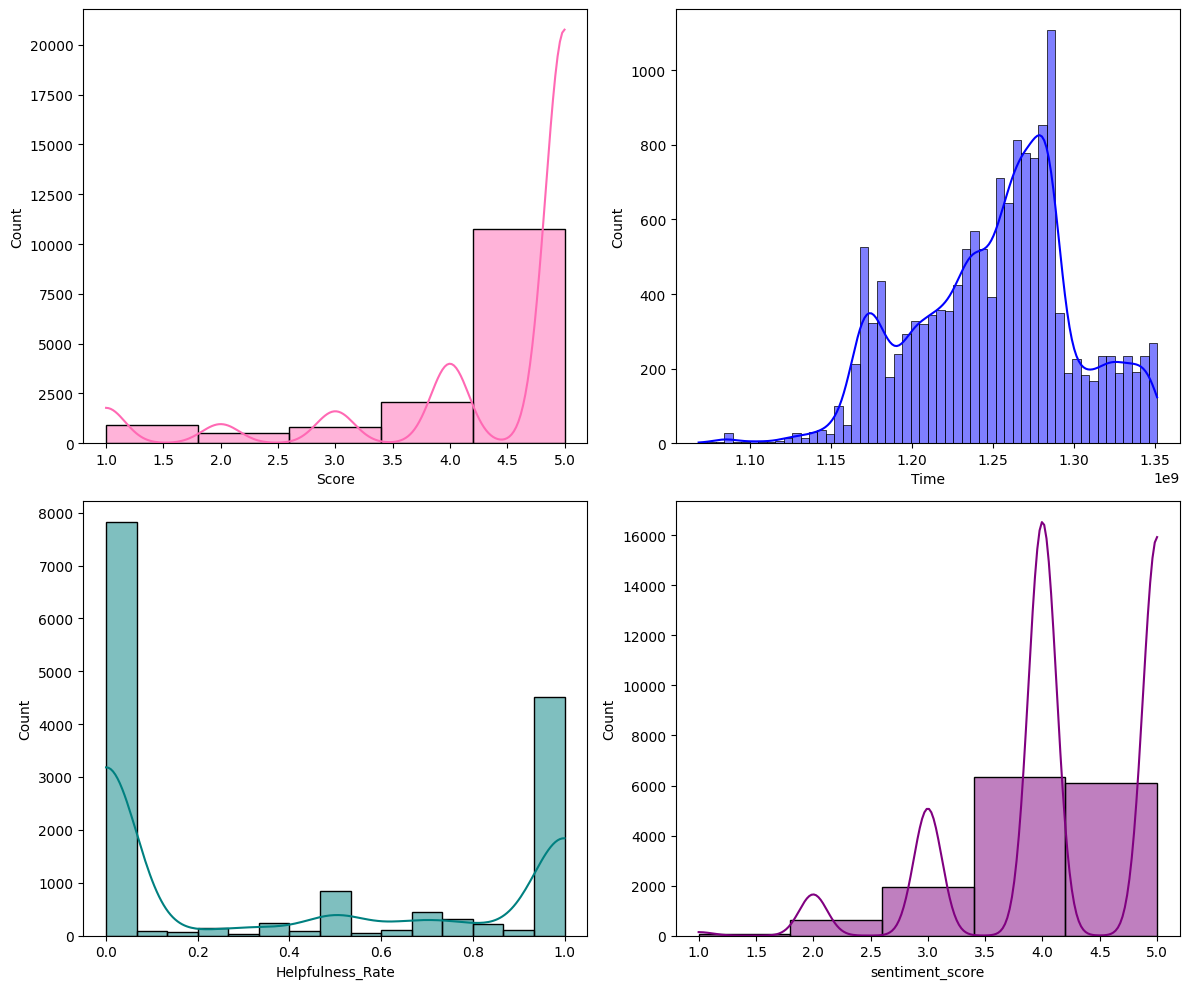

In [42]:
#visualize  distrubition of data with histogram and kde.

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
colors = ["hotpink","blue","teal","purple"]

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each distribution on a separate subplot
sns.histplot(df.Score,bins = 5, kde=True, ax=axes[0], color=colors[0])
sns.histplot(df.Time, kde=True, ax=axes[1], color=colors[1])
sns.histplot(df.Helpfulness_Rate, kde=True, ax=axes[2], color=colors[2])
sns.histplot(df.sentiment_score, bins = 5 ,kde=True, ax=axes[3], color=colors[3])

plt.tight_layout()

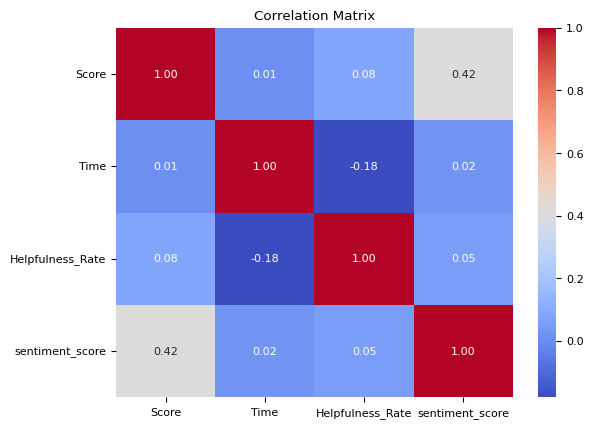

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In the heatmap above, correlation between all numerical features are visualized. The lowest correlation belongs to time and helpfulness rate, whereas the highest correlation is between score (original) and sentiment score (from sentiment analyzer).

In [ ]:
# Here, we did min max scaling to the numerical columns
int_columns = df.select_dtypes(include=['int']).columns
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[int_columns] = scaler.fit_transform(df[int_columns])
df_scaled.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate,sentiment_score
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",0.75,0.779982,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0,1.00
1,B001GVISJM,AJ613OLZZUG7V,Mare's,1.00,0.834910,Twizzlers,love candy weight watchers cut back still craving,0.0,0.75
2,B001GVISJM,A3RXAU2N8KV45G,lady21,0.00,0.934391,Nasty No flavor,candy red flavor plan chewy would never buy,0.0,0.50
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,0.00,0.477876,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0,0.50
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,0.00,0.519988,stale product.,arrived days stale could eat bags,1.0,0.50


In [ ]:
df.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate,sentiment_score
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0,5
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,love candy weight watchers cut back still craving,0.0,4
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy,0.0,3
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0,3
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived days stale could eat bags,1.0,3


In [ ]:
# We dropped the columns below because they are either non-numerical or redundant.
columnsToDrop = ['UserId', 'ProfileName', 'ProductId', 'Summary', 'Time', 'Text']
df_scaled = df_scaled.drop(columnsToDrop, axis=1)
df_scaled.head()

,Score,Helpfulness_Rate,sentiment_score
0,0.75,1.0,1.00
1,1.00,0.0,0.75
2,0.00,0.0,0.50
3,0.00,0.0,0.50
4,0.00,1.0,0.50


Since there are 3 features left for clustering, we decided to reduce the dimension. We used PCA (Principle Component Analysis) to achieve this. Component number 2 was chosen to reduce 3 dimensions to 2.

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled[['Helpfulness_Rate', 'Score', 'sentiment_score']])
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

In [ ]:
df_pca.head()

,PCA1,PCA2
0,0.597581,0.059778
1,-0.385666,-0.150791
2,-0.487870,0.848870
3,-0.487870,0.848870
4,0.506975,0.950262


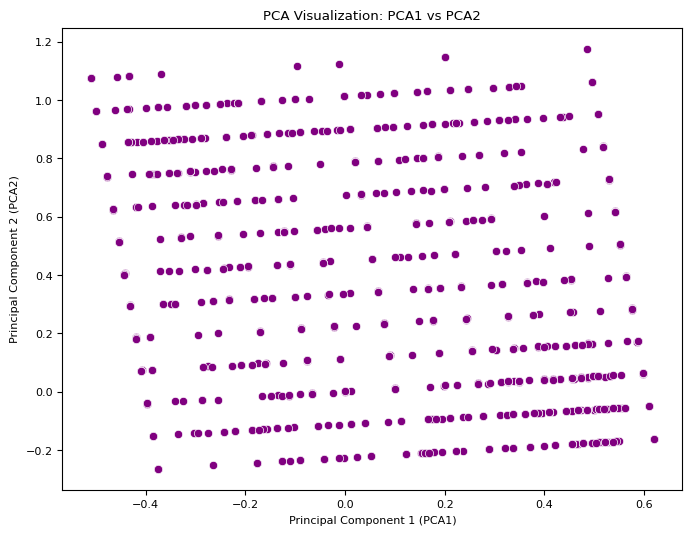

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca, color='purple')
plt.title('PCA Visualization: PCA1 vs PCA2')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.show()

Above, is a scatter plot to visualize these two pca's.

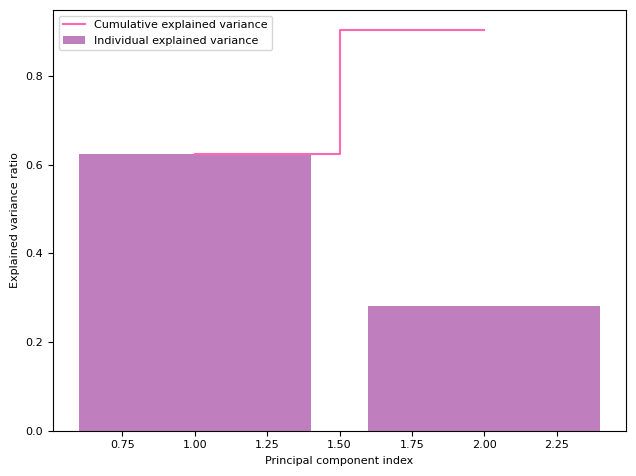

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.bar(range( 1,len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance', color='purple')
plt.step(range(1,len(cumulative_explained_variance)+1), cumulative_explained_variance, where='mid',label='Cumulative explained variance', color='hotpink')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In the plot above, we visualized the explained variances and cumulative explained variances of PCA1 and PCA2.

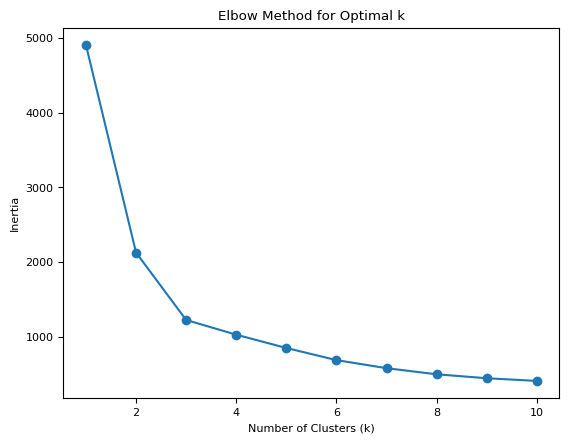

In [ ]:
inertia_values = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Above, we plotted inertia-k graph to use elbow method and pick the best k value. We picked 3.

In the code segment below, we applied k-means clustering without pca.

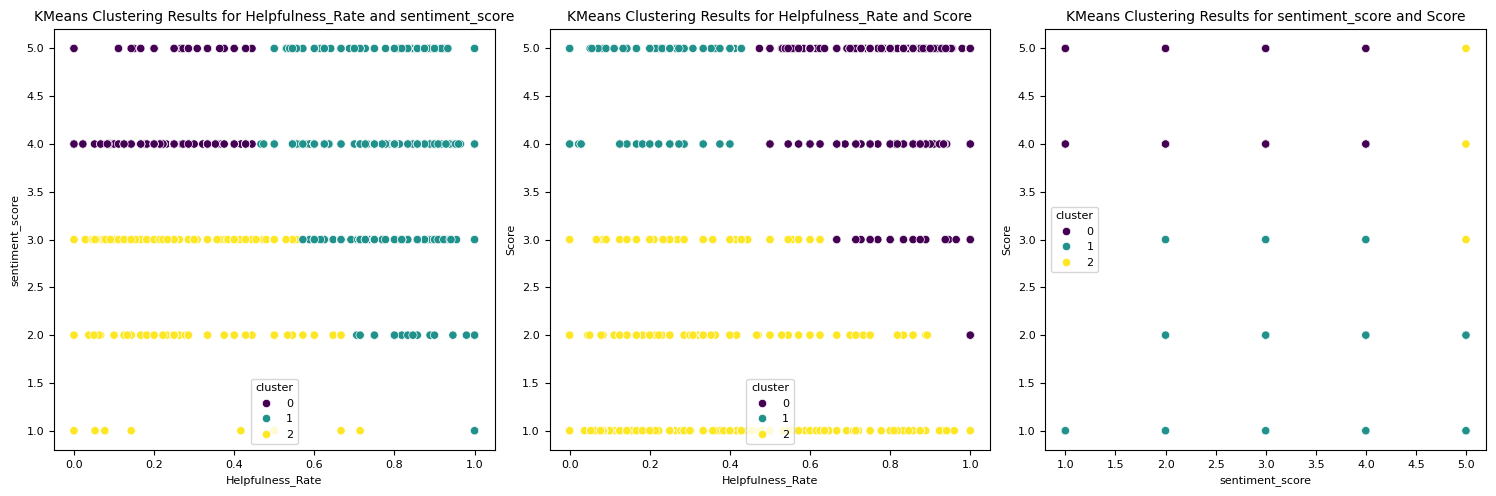

In [ ]:
columns_to_visualize = ['Helpfulness_Rate', 'sentiment_score', 'Score']
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=10)

# Set up the subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()


# Fit KMeans and add cluster labels to the DataFrame
df['cluster'] = kmeans.fit_predict(df_scaled[['Helpfulness_Rate', 'sentiment_score']])
sns.scatterplot(x='Helpfulness_Rate', y="sentiment_score", hue='cluster', data=df, palette='viridis', ax=axes[0])
axes[0].set_title(f'KMeans Clustering Results for Helpfulness_Rate and sentiment_score', fontsize=10)
axes[0].set_xlabel("Helpfulness_Rate")
axes[0].set_ylabel("sentiment_score")

df['cluster'] = kmeans.fit_predict(df_scaled[['Helpfulness_Rate', 'Score']])
sns.scatterplot(x='Helpfulness_Rate', y="Score", hue='cluster', data=df, palette='viridis', ax=axes[1])
axes[1].set_title(f'KMeans Clustering Results for Helpfulness_Rate and Score', fontsize=10)
axes[1].set_xlabel("Helpfulness_Rate")
axes[1].set_ylabel("Score")

df['cluster'] = kmeans.fit_predict(df_scaled[['sentiment_score', 'Score']])
sns.scatterplot(x='sentiment_score', y="Score", hue='cluster', data=df, palette='viridis', ax=axes[2])
axes[2].set_title(f'KMeans Clustering Results for sentiment_score and Score', fontsize=10)
axes[2].set_xlabel("sentiment_score")
axes[2].set_ylabel("Score")
# Adjust layout
plt.tight_layout()
plt.show()


Below, we applied k-means clustering with PCA.

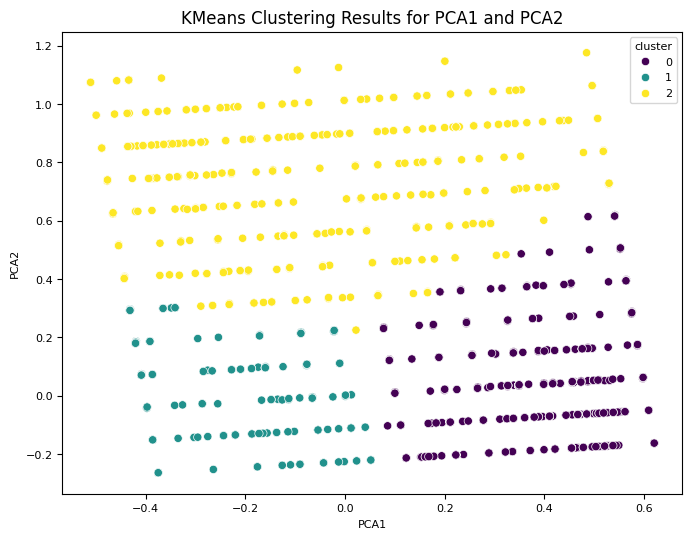

In [ ]:
columns_to_visualize_PCA = ['PCA1', 'PCA2']
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

df_pca['cluster'] = kmeans.fit_predict(df_pca[columns_to_visualize_PCA])

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis', ax=axes)
axes.set_title('KMeans Clustering Results for PCA1 and PCA2', fontsize=12)
axes.set_xlabel("PCA1")
axes.set_ylabel("PCA2")

plt.show()

In [ ]:
df.drop('cluster',inplace = True,axis=1)

We used "cluster" variable in visualization, therefore we do not need it anymore.

## Predictive Modelling



In this step, we are expected to apply two classification methods. We chose knn
classification and random forest tree.


**KNN**

In [ ]:
df.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate,sentiment_score
0,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0,5
1,B001GVISJM,AJ613OLZZUG7V,Mare's,5,1304467200,Twizzlers,love candy weight watchers cut back still craving,0.0,4
2,B001GVISJM,A3RXAU2N8KV45G,lady21,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy,0.0,3
3,B001EO5QW8,A108P30XVUFKXY,Roberto A,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0,3
4,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,1,1215302400,stale product.,arrived days stale could eat bags,1.0,3


Here, we checked if userid was unique. There are 9536 unique user ids whereas 15k rows. This means there are multiple reviews from the same user. Therefore, we added this feature to our predictors.

In [ ]:
len(df['UserId'].unique())

9536

In [ ]:
df_scaled.head()

,Score,Helpfulness_Rate,sentiment_score
0,0.75,1.0,1.00
1,1.00,0.0,0.75
2,0.00,0.0,0.50
3,0.00,0.0,0.50
4,0.00,1.0,0.50


Firstly, we encoded our categorical features. These are product id and user id.Then, we split the data by 60:20:20 ratio to train, validation and test sets respectively. After that, we printed the sizes of these sets.

In [ ]:
# Features (X) and target variable (y)
X = df.drop(['Score', 'ProfileName', 'Text', 'Summary'], axis=1)  # Drop the target variable and redundant variables
y = df['Score']
encoder = ce.TargetEncoder(cols=['ProductId', 'UserId'])
X_encoded = encoder.fit_transform(X, y)

# Split the data into training, validation, and test sets 60-20-20 ratio
X_train_knn, X_temp_knn, y_train_knn, y_temp_knn = train_test_split(X_encoded, y, test_size=0.4, random_state=42)
X_val_knn, X_test_knn, y_val_knn, y_test_knn = train_test_split(X_temp_knn, y_temp_knn, test_size=0.5, random_state=42)

print(f'Train set size: {len(X_train_knn)}')
print(f'Validation set size: {len(X_val_knn)}')
print(f'Test set size: {len(X_test_knn)}')

Train set size: 9036
Validation set size: 3012
Test set size: 3013


In the code segment below, we defined a train_knn function that trains with the given k and p values. K is the number of neighbours and p is the distance measure. p=1 is manhattan distance whereas p=2 is euclidean distance. <br><br>
At K=1, the KNN tends to closely follow the training data and thus shows a high training score. However, in comparison, the test score is quite low, thus indicating overfitting. Therefore we didn't include k=1 in the k_values list.
<br><br>
After calling this function for different k and p values, we printed the best ones. They are k=3 and p=1.

In [ ]:
def train_knn(X_train, y_train, X_val, y_val, k, p):
    knn = KNeighborsClassifier(n_neighbors=k, p=p)
    knn.fit(X_train, y_train)
    y_prob_knn = knn.predict_proba(X_val)[:, 1]
    y_pred_knn = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_knn)
    return accuracy, y_pred_knn, y_prob_knn

k_values = list(range(2, 31))
p_values = [1, 2]   # p=1 is for Manhattan and p=2 is for Euclidean
best_accuracy = 0
best_k = 0
best_p = 0

for k in k_values:
    for p in p_values:
        accuracy, y_pred_knn, y_prob_knn = train_knn(X_train_knn, y_train_knn, X_val_knn, y_val_knn, k, p)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_p = p

print(f'Best k: {best_k}, Best p: {best_p}')

Best k: 3, Best p: 1


Then we used these best k and p values to train our data. Finally we reported the classification metrics.

In [ ]:
# Evaluate the model on the test set with best k and p values
_, y_pred_knn, _ = train_knn(X_train_knn, y_train_knn, X_test_knn, y_test_knn, best_k, best_p)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_knn, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test_knn, y_pred_knn))

Accuracy: 0.7547295054762695
Classification Report:
              precision    recall  f1-score   support

           1       0.49      0.41      0.44       186
           2       0.36      0.31      0.33        88
           3       0.48      0.38      0.42       175
           4       0.58      0.35      0.44       417
           5       0.82      0.91      0.86      2147

    accuracy                           0.75      3013
   macro avg       0.55      0.47      0.50      3013
weighted avg       0.73      0.75      0.74      3013



**Random Forest**

We used Random Forest  as second classification model.
Random Forest is an ensemble learning algorithm used for classification tasks. It operates by constructing a multitude of decision trees during training and outputs the mode (most frequent class) of the individual trees for classification. Each tree is built using a random subset of the training data and a random subset of features at each node. This randomness helps to decorrelate the trees, making the ensemble more robust and less prone to overfitting. During prediction, the input data traverse through each tree, and the class with the majority of votes across all trees is assigned as the final prediction. Random Forests are known for their flexibility, high accuracy, and ability to handle large and complex datasets.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15061 entries, 0 to 15074
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductId         15061 non-null  object 
 1   UserId            15061 non-null  object 
 2   ProfileName       15061 non-null  object 
 3   Score             15061 non-null  int64  
 4   Time              15061 non-null  int64  
 5   Summary           15061 non-null  object 
 6   Text              15061 non-null  object 
 7   Helpfulness_Rate  15061 non-null  float64
 8   sentiment_score   15061 non-null  Int64  
dtypes: Int64(1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


Firstly, we encoded our categorical features. These are product id and user id.Then, we split the data by 60:20:20 ratio to train, validation and test sets respectively. After that, we printed the sizes of these sets.

In [ ]:
encoder = ce.TargetEncoder(cols=['ProductId', 'UserId'])
X_encoded = encoder.fit_transform(df, y)
X_encoded.head()

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_Rate,sentiment_score
0,4.243973,4.356944,"willie ""roadie""",4,1288915200,fresh and greasy!,good flavor came securely packed fresh delicio...,1.0,5
1,4.243973,4.487052,Mare's,5,1304467200,Twizzlers,love candy weight watchers cut back still craving,0.0,4
2,4.243973,3.966618,lady21,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy,0.0,3
3,3.966618,4.068423,Roberto A,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oats ...,0.0,3
4,3.966618,3.966618,gary sturrock,1,1215302400,stale product.,arrived days stale could eat bags,1.0,3


In [ ]:
# Features (X) and target variable (y)
X2 = X_encoded.drop(['Score', 'ProfileName', 'Text', 'Summary'], axis=1)  # Drop the target variable and redundant variables
y = X_encoded['Score']


# Split the data into training, validation, and test sets 60-20-20 ratio
X_train_rf, X_temp_rf, y_train_rf, y_temp_rf = train_test_split(X2, y, test_size=0.4, random_state=42)
X_val_rf, X_test_rf, y_val_rf, y_test_rf = train_test_split(X_temp_rf, y_temp_rf, test_size=0.5, random_state=42)

print(f'Train set size: {len(X_train_rf)}')
print(f'Validation set size: {len(X_val_rf)}')
print(f'Test set size: {len(X_test_rf)}')

Train set size: 9036
Validation set size: 3012
Test set size: 3013


Below, we tune the hypermeters by using random search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_train_rf, y_train_rf)

best_params_random = random_search.best_params_
print("Best Hyperparameters (Randomized Search):", best_params_random)

best_model_random = random_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred_best_random = best_model_random.predict(X_test_rf)
test_accuracy_best_random = accuracy_score(y_test_rf, y_test_pred_best_random)
print(f"Test Accuracy (Best Model - Randomized Search): {test_accuracy_best_random:.2f}")


Best Hyperparameters (Randomized Search): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Test Accuracy (Best Model - Randomized Search): 0.99


In [ ]:
# Train a Random Forest model
random_forest = RandomForestClassifier(n_estimators=100,min_samples_split = 5, min_samples_leaf = 1, random_state=42)
random_forest.fit(X_train_rf, y_train_rf)

# Predict on the validation set
y_val_pred_rf = random_forest.predict(X_val_rf)

# Predict on the test set
y_test_pred_rf = random_forest.predict(X_test_rf)
y_test_probs = random_forest.predict_proba(X_test_rf)

We create a Random Forest classifier with 100 trees and set the random seed (random_state=42) for reproducibility.
Then we predict target variable for a random forest validation set and test set.
After that, we obtained the predicted probabilities for each class on the test set.

## Model Evaluation and Visualizations



**KNN**

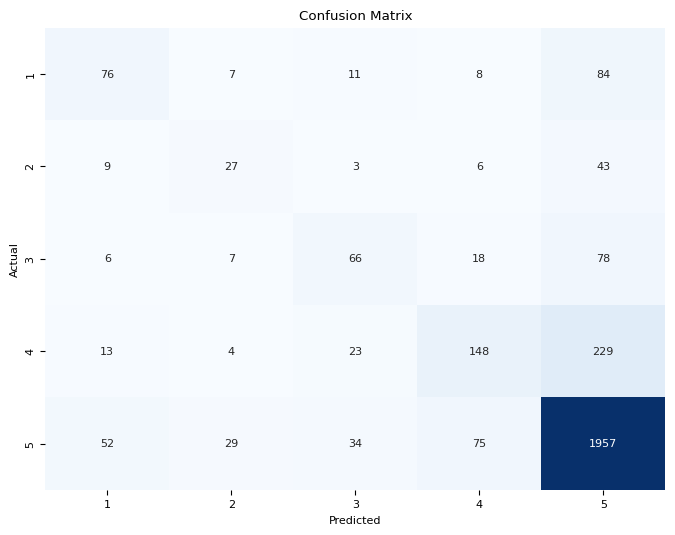

In [ ]:
cm = confusion_matrix(y_test_knn, y_pred_knn)

plt.figure(figsize=(8, 6))
labels = [1,2,3,4,5]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The figure above is the confusion matrix for knn classifier predictions.

For score = 1: <br>
False positive (fp) is all cells in the confusion matrix that are predicted as 1 but actually not 1.<br>
False negative (fn) is all cells in the confusion matrix that are actually 1 but predicted mistakenly.<br>
True positive (tp) is all cells in the confusion matrix that are predicted as 1 and are actually 1.<br>
True negative (tn) is all cells in the confusion matrix that are predicted as not 1 and actually are not 1.

We displayed metrics for all scores 1-5.

In [ ]:
fp, fn, tp = cm[1,0]+cm[2,0]+cm[3,0]+cm[4,0], cm[0, 1]+cm[0,2]+cm[0,3]+cm[0,4], cm[0,0]
tn = np.sum(cm) - (fp+fn+tp)

accuracy = (tp+tn) / (tp+tn+fn+fp)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1Rate = 2*precision*recall / (precision+recall)

print("Conditions for score-1\n----------------------")
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1Rate, 3))

Conditions for score-1
----------------------
Accuracy: 0.937
Precision: 0.487
Recall: 0.409
F1 Score: 0.444


In [ ]:
fp, fn, tp = cm[0,1]+cm[2,1]+cm[3,1]+cm[4,1], cm[1, 0]+cm[1,2]+cm[1,3]+cm[1,4], cm[1,1]
tn = np.sum(cm) - (fp+fn+tp)

accuracy = (tp+tn) / (tp+tn+fn+fp)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1Rate = 2*precision*recall / (precision+recall)

print("Conditions for score-2\n----------------------")
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1Rate, 3))

Conditions for score-2
----------------------
Accuracy: 0.964
Precision: 0.365
Recall: 0.307
F1 Score: 0.333


In [ ]:
fp, fn, tp = cm[0,2]+cm[1,2]+cm[3,2]+cm[4,2], cm[2, 0]+cm[2,1]+cm[2,3]+cm[2,4], cm[2,2]
tn = np.sum(cm) - (fp+fn+tp)

accuracy = (tp+tn) / (tp+tn+fn+fp)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1Rate = 2*precision*recall / (precision+recall)

print("Conditions for score-3\n----------------------")
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1Rate, 3))

Conditions for score-3
----------------------
Accuracy: 0.94
Precision: 0.482
Recall: 0.377
F1 Score: 0.423


In [ ]:
fp, fn, tp = cm[0,3]+cm[1,3]+cm[2,3]+cm[4,3], cm[3, 0]+cm[3,1]+cm[3,2]+cm[3,4], cm[3,3]
tn = np.sum(cm) - (fp+fn+tp)

accuracy = (tp+tn) / (tp+tn+fn+fp)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1Rate = 2*precision*recall / (precision+recall)

print("Conditions for score-4\n----------------------")
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1Rate, 3))

Conditions for score-4
----------------------
Accuracy: 0.875
Precision: 0.58
Recall: 0.355
F1 Score: 0.44


In [ ]:
fp, fn, tp = cm[0,4]+cm[1,4]+cm[2,4]+cm[3,4], cm[4, 0]+cm[4,1]+cm[4,2]+cm[4,3], cm[4,4]
tn = np.sum(cm) - (fp+fn+tp)

accuracy = (tp+tn) / (tp+tn+fn+fp)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1Rate = 2*precision*recall / (precision+recall)

print("Conditions for score-5\n----------------------")
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1Rate, 3))

Conditions for score-5
----------------------
Accuracy: 0.793
Precision: 0.818
Recall: 0.912
F1 Score: 0.862


As can be seen above:<br>
Highest accuracy rate: score=2<br>
Highest precision rate: score=5<br>
Highest recall rate: score=5<br>
Highest F1 rate: score=5<br>
In summary, the model performs well overall, achieving high accuracy, precision, recall, and F1 score for especially the class with score=5. However, the interpretation also depends on the specific context and the importance of different metrics based on the application requirements.

**RANDOM FOREST**

In [ ]:
accuracy_rf_val = accuracy_score(y_val_rf, y_val_pred_rf)
print(f"Validation Accuracy (Random Forest): {accuracy_rf_val:.2f}")

accuracy_rf = accuracy_score(y_test_rf, y_test_pred_rf)
print(f"Test Accuracy (Random Forest): {accuracy_rf:.2f}")
print("Classification Report (Random Forest):\n", classification_report(y_test_rf, y_test_pred_rf, zero_division=1))

Validation Accuracy (Random Forest): 1.00
Test Accuracy (Random Forest): 0.99
Classification Report (Random Forest):
               precision    recall  f1-score   support

           1       0.99      0.98      0.99       186
           2       0.94      0.95      0.95        88
           3       0.96      0.95      0.95       175
           4       0.97      0.98      0.98       417
           5       1.00      1.00      1.00      2147

    accuracy                           0.99      3013
   macro avg       0.97      0.97      0.97      3013
weighted avg       0.99      0.99      0.99      3013



Total Validation accuracy and testing accuracy are very high.

**According to Classification report :**
We can see  the number of actual occurrences of the class in the specified dataset (support) and the metrics like precision, recall and f1 score for each label.

**Macro Average:**

This is the average of the precision, recall, and F1-score across all classes. In this case, it's around 97%, indicating good overall performance.

**Weighted Average:**

This is the weighted average of precision, recall, and F1-score, where each class's score is weighted by its support. It is also around 99%, suggesting a high overall performance, especially considering the imbalanced nature of the dataset.

In summary, the Random Forest model seems to perform very well on our dataset, with high accuracy and good precision, recall, and F1-score for each class.

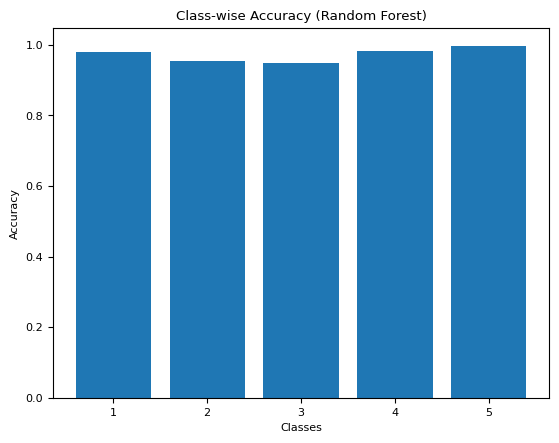

In [ ]:
cm_rf = confusion_matrix(y_test_rf, y_test_pred_rf)
class_accuracy = np.diagonal(cm_rf) / np.sum(cm_rf, axis=1)

# Plotting class-wise accuracy
plt.bar(labels, class_accuracy)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy (Random Forest)')
plt.show()


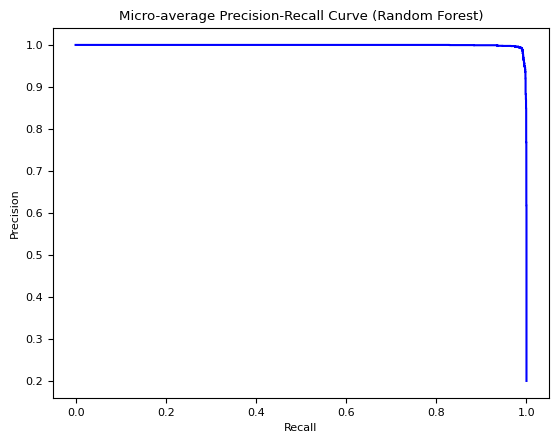

In [ ]:
# Binarize the labels for multiclass precision-recall curve
y_test_bin = label_binarize(y_test_rf, classes=labels)

# Assuming y_test_probs contains probabilities for each class
precision = dict()
recall = dict()

for i in range(len(labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_test_probs[:, i])

# Micro-average precision-recall curve
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_test_probs.ravel())

# Plotting the micro-average precision-recall curve
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-average Precision-Recall Curve (Random Forest)')
plt.show()


precision-recall curve is almost perfect, it suggests that the model is effective at making positive predictions (high precision) while also capturing a large proportion of the actual positive instances (high recall)

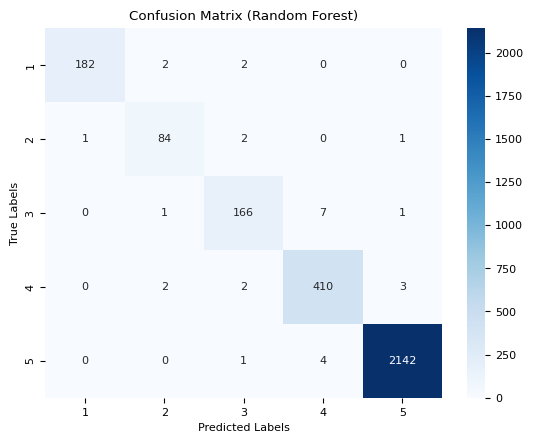

In [ ]:
cm_rf = confusion_matrix(y_test_rf, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

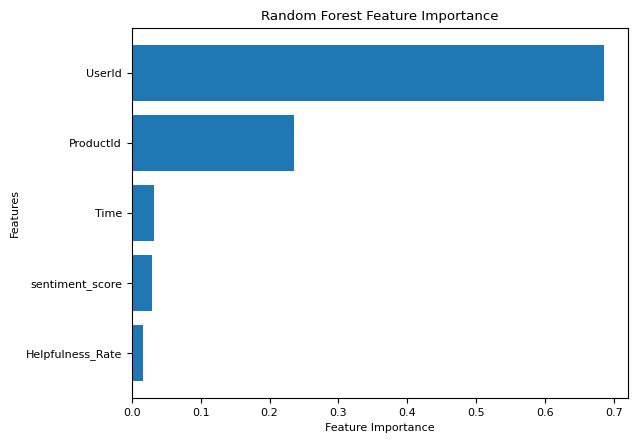

In [ ]:
feature_importances = random_forest.feature_importances_
sorted_idx = feature_importances.argsort()

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), X_train_rf.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

The most important feature is userId ın random forest model.

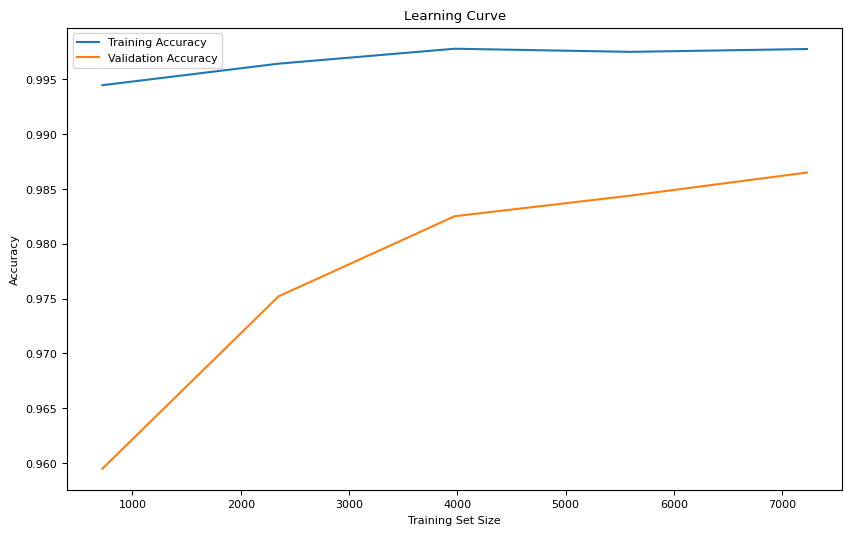

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    random_forest, X_train_rf, y_train_rf, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In an ideal scenario, both the training and validation curves should converge to a stable value. This suggests that the model is learning from the data without overfitting or underfitting. The model generalizes well to both the training and unseen data.
However ın our learning curve , the training curve shows significantly better performance than the validation curve, it may indicate overfitting. The model is memorizing the training set but fails to generalize to new data.

In [ ]:
# Train a Random Forest model
random_forest = RandomForestClassifier(n_estimators=50,min_samples_split = 4, min_samples_leaf = 2, random_state=42)
random_forest.fit(X_train_rf, y_train_rf)

# Predict on the validation set
y_val_pred_rf = random_forest.predict(X_val_rf)

# Predict on the test set
y_test_pred_rf = random_forest.predict(X_test_rf)
y_test_probs = random_forest.predict_proba(X_test_rf)

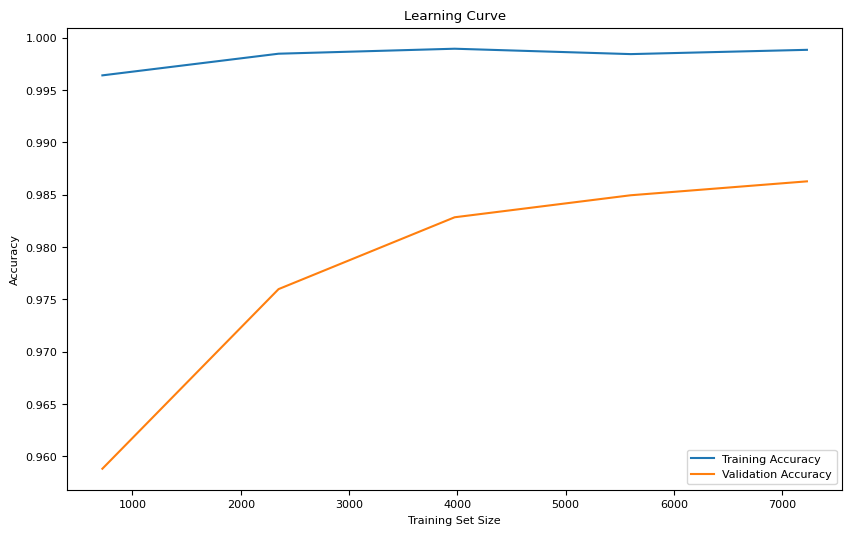

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    random_forest, X_train_rf, y_train_rf, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


Here are some reasons why a Random Forest model might be overfitting:


**Hyperparameter Tuning:**
The Random Forest algorithm has various hyperparameters, such as the number of trees, tree depth, minimum samples per leaf, and maximum features per split. If these hyperparameters are not properly tuned, the model may become too complex and prone to overfitting.
we optimize the hyperparameters with cross-validation.

**Too Many Trees:**
Increasing the number of trees in the Random Forest can lead to a more complex model that may overfit the training data.

**Tree Depth:**If the individual decision trees in the Random Forest have too much depth, they can capture noise in the training data.

**Minimum Samples per Leaf:**
Setting a very low value for the minimum number of samples required to form a leaf node can lead to overfitting.

**Feature Selection:**
Random Forests have the ability to select a random subset of features at each split. If the number of features considered at each split is too high, the model may overfit.

**Insufficient Data:**
If dataset is small, Random Forest models can be prone to overfitting.

**Imbalanced Classes:**
If dataset has imbalanced classes, the model might perform well on the majority class but poorly on the minority class. This may not be a true indication of the model's generalization ability. Addressing class imbalance through techniques like resampling or using appropriate evaluation metrics can help.
